In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [10]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

input_dir = 'C:/Users/ajaya/Desktop/csm191/ML Assignment/archive (4)'

count = 0

for dirname, _, filenames in os.walk(input_dir):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        
        if count < 2:
            print(file_path)
            count += 1
        
        # Interrompe o loop após imprimir os dois primeiros arquivos
        if count >= 2:
            break
    if count >= 2:
        break

C:/Users/ajaya/Desktop/csm191/ML Assignment/archive (4)\metadata.csv
C:/Users/ajaya/Desktop/csm191/ML Assignment/archive (4)\metadata_rgb_only.csv


In [13]:
# Importing essential libraries

import numpy as np  # Library for numerical operations and array manipulations
import pandas as pd  # Library for data processing and analysis, mainly for working with CSV files
import matplotlib.pyplot as plt  # Library for plotting and visualizing data
import seaborn as sns  # Library for making statistical data visualizations easier

# Importing Keras (a deep learning library) and TensorFlow (the backend engine for Keras)
import keras  # High-level neural networks API running on top of TensorFlow
import tensorflow as tf  # Open-source deep learning library for training neural networks

# Importing functions to work with image data for our model
from keras.preprocessing.image import load_img  # Function to load images into memory
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Class for augmenting and preprocessing image data

# Configuring TensorFlow to run functions eagerly, useful for debugging
tf.config.experimental_run_functions_eagerly(True)

In [15]:
metadata_path = 'C:/Users/ajaya/Desktop/csm191/ML Assignment/archive (4)/metadata.csv'
metadata_df = pd.read_csv(metadata_path)
image_dir = 'C:/Users/ajaya/Desktop/csm191/ML Assignment/archive (4)/Brain Tumor Data Set/Brain Tumor Data Set/'

# Check the first few rows of the file to understand its structure
print("Shape of the metadata:", metadata_df.shape)
metadata_df.head()

Shape of the metadata: (4600, 6)


,Unnamed: 0,image,class,format,mode,shape
0,0,Cancer (1).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
1,1,Cancer (1).png,tumor,PNG,L,"(300, 240)"
2,2,Cancer (1).tif,tumor,TIFF,RGB,"(256, 256, 3)"
3,3,Cancer (10).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
4,4,Cancer (10).tif,tumor,TIFF,RGB,"(256, 256, 3)"


In [17]:
# Define the batch size, which is the number of images the model will process at once during training
BATCH_SIZE = 64

# Set the target size for the images. All images will be resized to 150x150 pixels
IMAGE_SIZE = 150

# Specify the input shape for the model. 
# The images are 150x150 pixels and converted to grayscale (1 channel), so the input shape is (150,150,1)
input_shape = (150, 150, 1)

In [19]:
data_gen = ImageDataGenerator(rescale=1./255,   # Normalize pixel values
                              validation_split=0.2) 

In [21]:
train_gen = data_gen.flow_from_directory(image_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=True,
                                        class_mode = "binary",
                                        subset = "training")

Found 3681 images belonging to 2 classes.


In [23]:
val_gen = data_gen.flow_from_directory(image_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=False,
                                        class_mode = "binary",
                                        subset = "validation")

Found 919 images belonging to 2 classes.


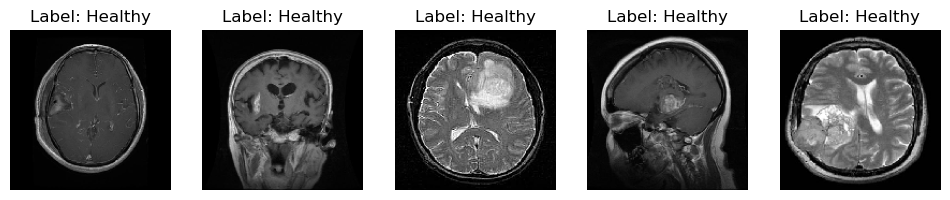

In [25]:
# Obtain a batch of images and labels from the training generator
images, labels = next(train_gen)  # Load the next batch of images from the generator

# Set the number of images to visualize
num_images = 5

# Adjust the figure size to display multiple images
plt.figure(figsize=(12, 12))

# Loop through and display the selected number of images
for i in range(num_images):
    # Create subplots to display multiple images in a grid
    plt.subplot(1, num_images, i + 1)
    
    # Display the image in grayscale
    plt.imshow(images[i].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    
    # Set the title of each subplot based on the label (0 for Healthy, 1 for Tumor)
    label = "Tumor" if labels[i] == 1 else "Healthy"
    plt.title(f"Label: {label}")
    
    # Remove the axis lines and ticks for a cleaner display
    plt.axis('off')

In [27]:
# Get the class indices from the training generator
labels = train_gen.class_indices  # Returns a dictionary mapping class names to numerical labels (e.g., {'Healthy': 0, 'Tumor': 1})

# Convert the dictionary keys (class names) into a list
classes = list(labels.keys())  # Extracts the class names into a list (e.g., ['Healthy', 'Tumor'])

# Print the class names
print(classes) 

['Brain Tumor', 'Healthy']


In [29]:
# Importing necessary components for building the Convolutional Neural Network (CNN)
from keras.models import Sequential  # Sequential model allows us to stack layers linearly, one after the other.
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout  # Layers used to construct the model:
# - Dense: Fully connected layer, used for the final classification.
# - Conv2D: 2D convolutional layer, used to detect patterns in 2D data like images.
# - MaxPooling2D: Pooling layer, reduces the spatial dimensions (width, height) of the image, keeping important features.
# - BatchNormalization: Normalizes the inputs to a layer, improving training speed and stability.
# - Flatten: Flattens the 2D/3D input to a 1D vector for the fully connected layers.
# - Dropout: Randomly drops units during training to prevent overfitting and improve model generalization.

In [31]:
# Initializing the Sequential model, which is a linear stack of layers.
model = Sequential()

# Adding an InputLayer that defines the input shape of the images (150x150 pixels, 1 channel for grayscale).
model.add(keras.layers.InputLayer(shape=(150, 150, 1)))

# Adding the first convolutional layer with 16 filters, each of size 3x3. Using ReLU as the activation function.
model.add(Conv2D(16, (3, 3), activation="relu"))

# Adding a MaxPooling layer to reduce the spatial dimensions by a factor of 2 (from 150x150 to 75x75).
model.add(MaxPooling2D((2, 2)))

# Adding a second convolutional layer with 32 filters, each of size 3x3. Again, using ReLU as the activation function.
model.add(Conv2D(32, (3, 3), activation="relu"))

# Adding another MaxPooling layer to further reduce the spatial dimensions by a factor of 2.
model.add(MaxPooling2D((2, 2)))

# Flattening the 3D output (from the convolutional layers) into a 1D vector for the fully connected layers.
model.add(Flatten())

# Adding a fully connected (dense) layer with 512 neurons and ReLU activation function.
model.add(Dense(512, activation="relu"))

# Adding a Dropout layer that randomly drops 20% of the neurons during training to prevent overfitting.
model.add(Dropout(0.2))

# Adding the output layer with 1 neuron and a sigmoid activation function (since it's a binary classification problem).
model.add(Dense(1, activation='sigmoid'))

In [33]:
# Compile the model by specifying the optimizer, loss function, and evaluation metrics
model.compile(
    optimizer='adam',              # The Adam optimizer is used for its efficiency in training deep learning models
    loss='binary_crossentropy',     # The binary cross-entropy loss function is suitable for binary classification problems
    metrics=['accuracy']            # Track the accuracy metric during training to evaluate model performance
)

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,239,489 (81.02 MB)

 Trainable params: 21,239,489 (81.02 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
with tf.device('/device:GPU:0'):  # Specifies that the model should be trained using the first available GPU.
    history = model.fit(
        train_gen,  # The training data generator that yields batches of images and labels.
        verbose=1,  # Enables the display of progress bars during training.
        epochs=5,  # The number of times the entire dataset will be passed through the model (5 epochs).
        validation_data=val_gen,  # The validation data generator used to evaluate the model during training.
        steps_per_epoch=3681//64,  # The number of steps (batches of samples) to run in one epoch.
        validation_steps=919//64  # The number of validation steps to run after each training epoch.
    )

Epoch 1/5


C:\Users\ajaya\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
C:\Users\ajaya\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 49s 808ms/step - accuracy: 0.5799 - loss: 0.9851 - val_accuracy: 0.8438 - val_loss: 0.3266
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7812 - loss: 0.4309 - val_accuracy: 0.5217 - val_loss: 0.6703
Epoch 3/5


C:\Users\ajaya\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 489ms/step - accuracy: 0.8786 - loss: 0.2990 - val_accuracy: 0.9308 - val_loss: 0.1824
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.9219 - loss: 0.2277 - val_accuracy: 0.9130 - val_loss: 0.2258
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 494ms/step - accuracy: 0.9632 - loss: 0.1168 - val_accuracy: 0.9799 - val_loss: 0.0744


In [39]:
# Evaluate the model on the validation set
test_loss, test_acc = model.evaluate(
    val_gen  # The validation data generator used to evaluate the model performance after training
)

C:\Users\ajaya\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.9769 - loss: 0.0934


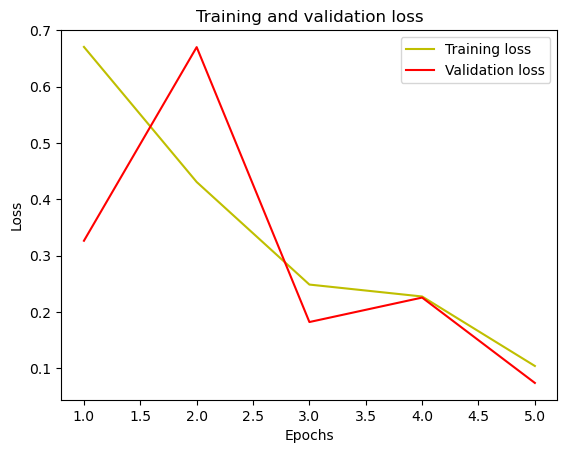

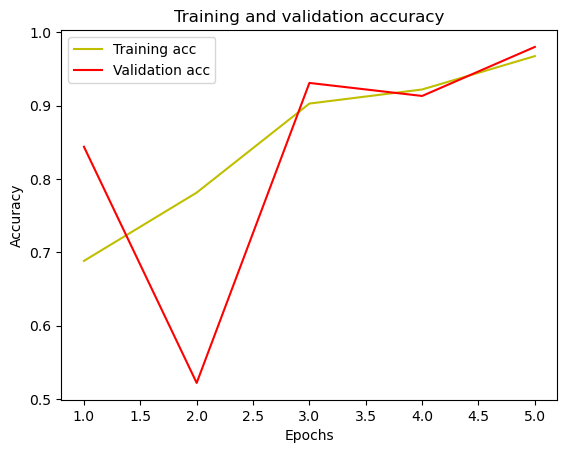

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Enter the path to the image:  C:/Users/ajaya/Desktop/normal.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


C:\Users\ajaya\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


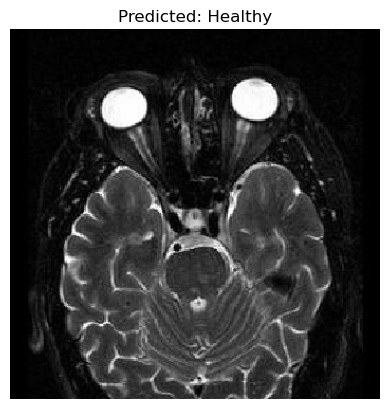

Predicted Confidence: 0.99 ('Healthy' if > 0.5 else 'Tumor')


In [72]:
from PIL import Image, ImageOps  # PIL is used for opening and processing images
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to load and preprocess an image (resize, convert to grayscale, and normalize)
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        return None
    # Open the image
    img = Image.open(image_path)
    
    # Convert image to grayscale
    img = ImageOps.grayscale(img)
    
    # Resize the image to the target size (150x150), using the LANCZOS filter for better quality
    img = ImageOps.fit(img, target_size, Image.LANCZOS)
    
    # Convert the image to a numpy array and normalize pixel values to [0, 1]
    img_array = np.asarray(img) / 255.0
    
    # Reshape the array to match the model input shape (1 sample, 150x150 pixels, 1 channel)
    img_array = img_array.reshape((1, 150, 150, 1))
    return img_array

# Function to predict the class of the image using a trained model
def predict_image_class(image_path, model):
    # Load and preprocess the image for the model
    img_data = load_and_preprocess_image(image_path)

    if img_data is not None:
        # Make a prediction using the model
        prediction = model.predict(img_data)
        
        # Display the original image along with the prediction
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(f"Predicted: {'Healthy' if prediction[0][0] > 0.5 else 'Tumor'}")
        plt.axis('off')
        plt.show()

        # Display the prediction confidence
        print(f"Predicted Confidence: {prediction[0][0]:.2f} ('Healthy' if > 0.5 else 'Tumor')")
    else:
        print("Image not found or could not be processed.")

# Example usage:
# Provide the path to the image and the trained model
image_path = input("Enter the path to the image: ")
predict_image_class(image_path, model)


Enter the path to the image:  C:/Users/ajaya/Desktop/tumor1.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


C:\Users\ajaya\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


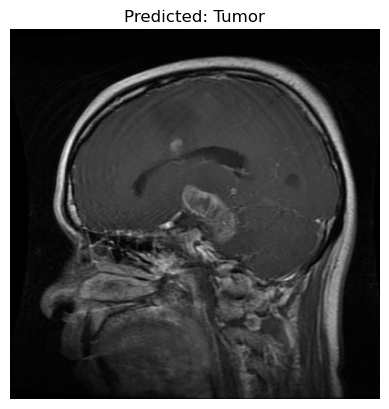

Predicted Confidence: 0.01 ('Healthy' if > 0.5 else 'Tumor')


In [74]:
from PIL import Image, ImageOps  # PIL is used for opening and processing images
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to load and preprocess an image (resize, convert to grayscale, and normalize)
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        return None
    # Open the image
    img = Image.open(image_path)
    
    # Convert image to grayscale
    img = ImageOps.grayscale(img)
    
    # Resize the image to the target size (150x150), using the LANCZOS filter for better quality
    img = ImageOps.fit(img, target_size, Image.LANCZOS)
    
    # Convert the image to a numpy array and normalize pixel values to [0, 1]
    img_array = np.asarray(img) / 255.0
    
    # Reshape the array to match the model input shape (1 sample, 150x150 pixels, 1 channel)
    img_array = img_array.reshape((1, 150, 150, 1))
    return img_array

# Function to predict the class of the image using a trained model
def predict_image_class(image_path, model):
    # Load and preprocess the image for the model
    img_data = load_and_preprocess_image(image_path)

    if img_data is not None:
        # Make a prediction using the model
        prediction = model.predict(img_data)
        
        # Display the original image along with the prediction
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(f"Predicted: {'Healthy' if prediction[0][0] > 0.5 else 'Tumor'}")
        plt.axis('off')
        plt.show()

        # Display the prediction confidence
        print(f"Predicted Confidence: {prediction[0][0]:.2f} ('Healthy' if > 0.5 else 'Tumor')")
    else:
        print("Image not found or could not be processed.")

# Example usage:
# Provide the path to the image and the trained model
image_path = input("Enter the path to the image: ")
predict_image_class(image_path, model)

Enter the path to the image:  C:/Users/ajaya/Desktop/Shiva.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


C:\Users\ajaya\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


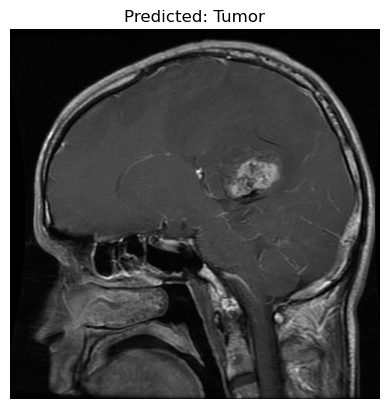

Predicted Confidence: 0.19 ('Healthy' if > 0.5 else 'Tumor')


In [76]:
from PIL import Image, ImageOps  # PIL is used for opening and processing images
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to load and preprocess an image (resize, convert to grayscale, and normalize)
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        return None
    # Open the image
    img = Image.open(image_path)
    
    # Convert image to grayscale
    img = ImageOps.grayscale(img)
    
    # Resize the image to the target size (150x150), using the LANCZOS filter for better quality
    img = ImageOps.fit(img, target_size, Image.LANCZOS)
    
    # Convert the image to a numpy array and normalize pixel values to [0, 1]
    img_array = np.asarray(img) / 255.0
    
    # Reshape the array to match the model input shape (1 sample, 150x150 pixels, 1 channel)
    img_array = img_array.reshape((1, 150, 150, 1))
    return img_array

# Function to predict the class of the image using a trained model
def predict_image_class(image_path, model):
    # Load and preprocess the image for the model
    img_data = load_and_preprocess_image(image_path)

    if img_data is not None:
        # Make a prediction using the model
        prediction = model.predict(img_data)
        
        # Display the original image along with the prediction
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(f"Predicted: {'Healthy' if prediction[0][0] > 0.5 else 'Tumor'}")
        plt.axis('off')
        plt.show()

        # Display the prediction confidence
        print(f"Predicted Confidence: {prediction[0][0]:.2f} ('Healthy' if > 0.5 else 'Tumor')")
    else:
        print("Image not found or could not be processed.")

# Example usage:
# Provide the path to the image and the trained model
image_path = input("Enter the path to the image: ")
predict_image_class(image_path, model)

Enter the path to the image:  C:/Users/ajaya/Desktop/ria.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


C:\Users\ajaya\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


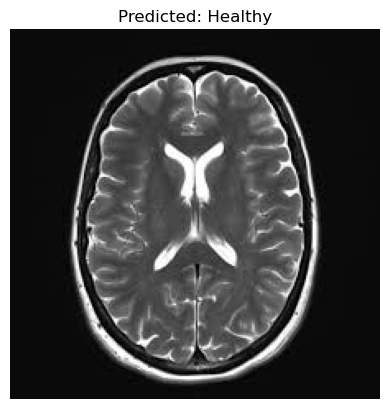

Predicted Confidence: 1.00 ('Healthy' if > 0.5 else 'Tumor')


In [78]:
from PIL import Image, ImageOps  # PIL is used for opening and processing images
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to load and preprocess an image (resize, convert to grayscale, and normalize)
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        return None
    # Open the image
    img = Image.open(image_path)
    
    # Convert image to grayscale
    img = ImageOps.grayscale(img)
    
    # Resize the image to the target size (150x150), using the LANCZOS filter for better quality
    img = ImageOps.fit(img, target_size, Image.LANCZOS)
    
    # Convert the image to a numpy array and normalize pixel values to [0, 1]
    img_array = np.asarray(img) / 255.0
    
    # Reshape the array to match the model input shape (1 sample, 150x150 pixels, 1 channel)
    img_array = img_array.reshape((1, 150, 150, 1))
    return img_array

# Function to predict the class of the image using a trained model
def predict_image_class(image_path, model):
    # Load and preprocess the image for the model
    img_data = load_and_preprocess_image(image_path)

    if img_data is not None:
        # Make a prediction using the model
        prediction = model.predict(img_data)
        
        # Display the original image along with the prediction
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(f"Predicted: {'Healthy' if prediction[0][0] > 0.5 else 'Tumor'}")
        plt.axis('off')
        plt.show()

        # Display the prediction confidence
        print(f"Predicted Confidence: {prediction[0][0]:.2f} ('Healthy' if > 0.5 else 'Tumor')")
    else:
        print("Image not found or could not be processed.")

# Example usage:
# Provide the path to the image and the trained model
image_path = input("Enter the path to the image: ")
predict_image_class(image_path, model)